### ConditionalGradient

Constraining the parameters of a neural network has been shown to be beneficial in training because of the underlying regularization effects. Often, parameters are constrained via a soft penalty (which never guarantees the constraint satisfaction) or via a projection operation (which is computationally expensive). Conditional gradient (CG) optimizer, on the other hand, enforces the constraints strictly without the need for an expensive projection step. It works by minimizing a linear approximation of the objective within the constraint set. 

In [1]:
!pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1MB 2.7MB/s 


In [2]:
import tensorflow as tf
import tensorflow_addons as tfa

from matplotlib import pyplot as plt

In [3]:
batch_size = 64
epochs = 10

In [4]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(784,), activation = 'relu', name = 'dense_1'),
    tf.keras.layers.Dense(64, activation = 'relu', name = 'dense_2'),
    tf.keras.layers.Dense(10, activation = 'softmax', name = 'predictions'),
])

In [5]:
# Prep MNIST Data

dataset = {}
num_validation = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

11493376/11490434 [==============================] - 0s 0us/step


### Define a Frobenius Norm Callback Function

In [6]:
def frobenius_norm(m):
    """This function is to calculate the frobenius norm of the matrix of all
    layer's weight.
  
    Args:
        m: is a list of weights param for each layers.
    """
    total_reduce_sum = 0
    for i in range(len(m)):
        total_reduce_sum = total_reduce_sum + tf.math.reduce_sum(m[i]**2)
    norm = total_reduce_sum**0.5
    return norm

In [7]:
CG_frobenius_norm_of_weight = []
CG_get_weight_norm = tf.keras.callbacks.LambdaCallback(
    on_epoch_end = lambda batch, logs: CG_frobenius_norm_of_weight.append(
        frobenius_norm(model_1.trainable_weights).numpy()))

### Train and Evaluate using CG Optimizer

In [9]:
model_1.compile(
    optimizer = tfa.optimizers.ConditionalGradient(
        learning_rate = 0.99949, lambda_ = 203),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])

history_cg = model_1.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    validation_data = (x_test, y_test),
    epochs = epochs,
    callbacks = [CG_get_weight_norm])

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3848 - accuracy: 0.8826 - val_loss: 0.2105 - val_accuracy: 0.9357
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1921 - accuracy: 0.9422 - val_loss: 0.1664 - val_accuracy: 0.9485
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1514 - accuracy: 0.9538 - val_loss: 0.1308 - val_accuracy: 0.9600
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1348 - accuracy: 0.9593 - val_loss: 0.1366 - val_accuracy: 0.9590
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1249 - accuracy: 0.9619 - val_loss: 0.1461 - val_accuracy: 0.9523
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1194 - accuracy: 0.9636 - val_loss: 0.1241 - val_accuracy: 0.9634
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1142 - accuracy: 0.9653 - val_loss: 0.1253 - val_accuracy: 0.9622
Epoch 

### Train and Evaluate using SGD Optimizer

In [10]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(784,), activation = 'relu', name = 'dense_1'),
    tf.keras.layers.Dense(64, activation = 'relu', name = 'dense_2'),
    tf.keras.layers.Dense(10, activation = 'softmax', name = 'predictions'),
])

In [11]:
SGD_frobenius_norm_of_weight = []
SGD_get_weight_norm = tf.keras.callbacks.LambdaCallback(
    on_epoch_end = lambda batch, logs: SGD_frobenius_norm_of_weight.append(
        frobenius_norm(model_2.trainable_weights).numpy()))

In [12]:
model_2.compile(
    optimizer = tf.keras.optimizers.SGD(0.01), 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])

history_sgd = model_2.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    validation_data = (x_test, y_test),
    epochs = epochs,
    callbacks = [SGD_get_weight_norm])

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.9817 - accuracy: 0.7379 - val_loss: 0.4295 - val_accuracy: 0.8871
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3868 - accuracy: 0.8926 - val_loss: 0.3284 - val_accuracy: 0.9065
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3216 - accuracy: 0.9087 - val_loss: 0.2889 - val_accuracy: 0.9186
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2880 - accuracy: 0.9173 - val_loss: 0.2636 - val_accuracy: 0.9245
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2638 - accuracy: 0.9255 - val_loss: 0.2467 - val_accuracy: 0.9291
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2450 - accuracy: 0.9308 - val_loss: 0.2305 - val_accuracy: 0.9336
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2295 - accuracy: 0.9348 - val_loss: 0.2175 - val_accuracy: 0.9359
Epoch 

### Frobenius Norm of Weights: CG vs SGD

The current implementation of CG optimizer is based on Frobenius Norm, with considering Frobenius Norm as regularizer in the target function. Therefore, we compare CG’s regularized effect with SGD optimizer, which has not imposed Frobenius Norm regularizer.

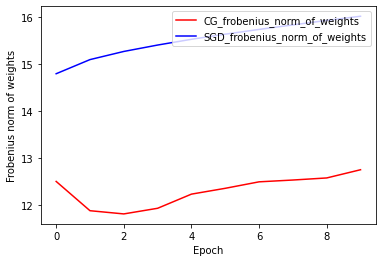

In [13]:
plt.plot(
    CG_frobenius_norm_of_weight,
    color = 'r',
    label = 'CG_frobenius_norm_of_weights')
plt.plot(
    SGD_frobenius_norm_of_weight,
    color = 'b',
    label = 'SGD_frobenius_norm_of_weights')
plt.xlabel('Epoch')
plt.ylabel('Frobenius norm of weights')
plt.legend(loc = 1)

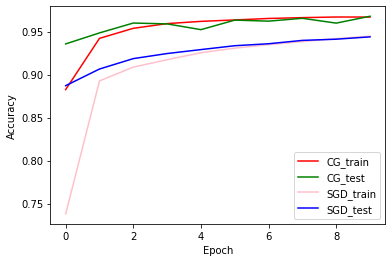

In [14]:
# Train and Validation Accuracy: CG vs SGD

plt.plot(history_cg.history['accuracy'], color = 'r', label = 'CG_train')
plt.plot(history_cg.history['val_accuracy'], color = 'g', label = 'CG_test')
plt.plot(history_sgd.history['accuracy'], color = 'pink', label = 'SGD_train')
plt.plot(history_sgd.history['val_accuracy'], color = 'b', label = 'SGD_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 4)